In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from ydata_profiling import ProfileReport
import numpy as np
import sklearn.impute as skl_imp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
# Ruta del archivo CSV
file_path =r'/Users/Camilo/Documents/tfm/TFM_inmobiliario_main/datamunging/consolidated_data.csv' 
# Leer el archivo CSV en un DataFrame
df = pd.read_csv(file_path, sep = ',')

/var/folders/6l/xmxqxb352dl57_n06gxvgs3m0000gn/T/ipykernel_6180/3706298470.py:4: DtypeWarning: Columns (11,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep = ',')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284168 entries, 0 to 284167
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   precio          281907 non-null  float64
 1   sub_descr       266015 non-null  object 
 2   href            284168 non-null  object 
 3   ubicacion       283928 non-null  object 
 4   habitaciones    272609 non-null  float64
 5   banios          260101 non-null  float64
 6   mt2             237111 non-null  float64
 7   otros           283630 non-null  object 
 8   latitude        111293 non-null  float64
 9   longitude       111293 non-null  float64
 10  planta          52815 non-null   float64
 11  CCAA            244179 non-null  object 
 12  fuente_datos    284168 non-null  object 
 13  alquiler_venta  284168 non-null  object 
 14  fecha_extract   284168 non-null  object 
 15  publicado_hace  170088 non-null  float64
 16  plataforma      170088 non-null  object 
 17  raw_json  

In [4]:
# Separar características y variable objetivo
X = df.drop('precio', axis=1)
X =X.drop(df.columns[-1], axis=1)
y = df['precio']

In [13]:
X.head(5)

sub_descr                                               href  \
0                 NaN  /alquilar/piso-zona_esperanza_de_triana41010-4...   
1  Piso en calle Ares  /alquilar/piso-bellavista_la_palmera_bellavist...   
2                 NaN       /alquilar/chalet-oromana-45028203361_517213/   
3                 NaN  /alquilar/piso-zona_ronda_de_triana_cartuja410...   
4                 NaN  /alquilar/piso-nervion_ciudad_jardin41005-4503...   

                                           ubicacion  habitaciones  banios  \
0  Zona Esperanza de Triana (Distrito Triana. Sev...           3.0     1.0   
1  Bellavista (Distrito Bellavista-La Palmera. Se...           3.0     2.0   
2                       Oromana (Alcalá de Guadaíra)           4.0     2.0   
3  Zona Ronda de Triana-Cartuja (Distrito Triana....           2.0     1.0   
4  Ciudad Jardín (Distrito Nervión. Sevilla Capital)           3.0     1.0   

     mt2                                              otros   latitude  \
0   69.0  ¡Alquiler para estudiantes! Contrato mínimo de...  37.379340   
1  105.0  Magnífico piso en urbanización exclusiva: jard...  37.332449   
2  146.0  Fantástico chalet en alquiler de larga tempora...  37.320301   
3   80.0  ¡Descubre tu nuevo hogar en el corazón de tria...  37.389190   
4   60.0  Piso en alquiler de 70 m² en ciudad jardin sol...  37.380612   

   longitude  planta     CCAA fuente_datos alquiler_venta fecha_extract  \
0  -6.003559     NaN  sevilla    pisos.com       alquiler    2024-07-09   
1  -5.965829     5.0  sevilla    pisos.com       alquiler    2024-07-09   
2  -5.856279     NaN  sevilla    pisos.com       alquiler    2024-07-09   
3  -6.008260     NaN  sevilla    pisos.com       alquiler    2024-07-09   
4  -5.961544     NaN  sevilla    pisos.com       alquiler    2024-07-09   

   publicado_hace plataforma  
0             NaN        NaN  
1             NaN        NaN  
2             NaN        NaN  
3             NaN        NaN  
4             NaN        NaN

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282805 entries, 0 to 282804
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sub_descr       264652 non-null  object 
 1   href            282805 non-null  object 
 2   ubicacion       282565 non-null  object 
 3   habitaciones    271267 non-null  float64
 4   banios          258770 non-null  float64
 5   mt2             235761 non-null  float64
 6   otros           282270 non-null  object 
 7   latitude        109950 non-null  float64
 8   longitude       109950 non-null  float64
 9   planta          52246 non-null   float64
 10  CCAA            242816 non-null  object 
 11  fuente_datos    282805 non-null  object 
 12  alquiler_venta  282805 non-null  object 
 13  fecha_extract   282805 non-null  object 
 14  publicado_hace  170088 non-null  float64
 15  plataforma      170088 non-null  object 
dtypes: float64(7), object(9)
memory usage: 34.5+ MB


In [14]:
X.describe()

habitaciones         banios             mt2       latitude  \
count  272609.000000  260101.000000   237111.000000  111293.000000   
mean        3.094127       1.985294      179.635609      39.718047   
std         1.681730       1.497637     2430.827394       2.001602   
min         1.000000       1.000000        1.000000       0.000000   
25%         2.000000       1.000000       75.000000      37.378085   
50%         3.000000       2.000000      105.000000      40.413229   
75%         4.000000       2.000000      170.000000      40.467637   
max       140.000000     332.000000  1000000.000000      43.508612   

           longitude        planta  publicado_hace  
count  111293.000000  52815.000000   170088.000000  
mean       -3.054054      3.013689      258.939814  
std         2.208628      2.165848      582.604292  
min       -16.749433      1.000000        1.000000  
25%        -3.742449      1.000000        3.000000  
50%        -3.678761      2.000000       10.000000  
75%        -3.448228      4.000000       30.000000  
max         2.764050     20.000000     2359.000000

In [16]:
ProfileReport(X)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
X.nunique()

sub_descr          87049
href              247399
ubicacion          10264
habitaciones          29
banios                29
mt2                 1551
otros             161443
latitude           63816
longitude          64470
planta                20
CCAA                  18
fuente_datos           2
alquiler_venta         2
fecha_extract         73
publicado_hace      1022
plataforma            28
dtype: int64

In [22]:
X.alquiler_venta.unique()

array(['venta', 'alquiler'], dtype=object)

### Gestión de categoricas

In [16]:
to_factor = list(X.loc[:,X.nunique() < 10])
X[to_factor] = X[to_factor].astype('category')

In [19]:
for column in to_factor:
    print('Variable: {}'.format(column))
    print('Valores únicos: {}\n'.format(X[column].nunique()))
    print(X[column].value_counts())
    print('\n')

Variable: CCAA
Valores únicos: 9

CCAA
barcelona          27974
madrid             12266
cadiz               7298
valencia            6620
granada             4845
malaga              4587
cantabria           2027
sevilla             1848
vizcaya_bizkaia      917
Name: count, dtype: int64


Variable: fuente_datos
Valores únicos: 1

fuente_datos
pisos.com    68382
Name: count, dtype: int64


Variable: alquiler_venta
Valores únicos: 2

alquiler_venta
alquiler    43369
venta       25013
Name: count, dtype: int64


Variable: raw_json
Valores únicos: 2

raw_json
{    "@context": "https://schema.org/",    "@type": "SingleFamilyResidence",    "@id": "45040072802.100500",            "image":"https://fotos.imghs.net/mm-wp/1005/799/1005_218884053799_1_2024061108063114052.jpg",            "name": "Chalet en Ca N\'amat",    "description": "Chalet en Ca N\'amat",    "url": "/comprar/chalet-sant_esteve_sesrovires_centro_urbano-45040072802_100500/",            "photo": {                "@type": "Imag

### Missings

In [5]:
# Calcular el porcentaje de missings por variable
missing_percentage = (X.isnull().sum() / len(X)) * 100

# Crear un DataFrame con los porcentajes de missings
missing_df = pd.DataFrame({'variable': X.columns, 'missing_percentage': missing_percentage})
# Ordenar el DataFrame por el porcentaje de missings de forma descendente
missing_df = missing_df.sort_values(by='missing_percentage', ascending=False)

variables_con_missings = missing_df[missing_df['missing_percentage'] > 0]

print(variables_con_missings)

                      variable  missing_percentage
planta                  planta           81.414163
latitude              latitude           60.835492
longitude            longitude           60.835492
publicado_hace  publicado_hace           40.145266
plataforma          plataforma           40.145266
mt2                        mt2           16.559570
CCAA                      CCAA           14.072309
banios                  banios            8.469286
sub_descr            sub_descr            6.388123
habitaciones      habitaciones            4.067664
otros                    otros            0.189325
ubicacion            ubicacion            0.084457


## Revisar variables planta, latitude,longitude, publicado hace, plataforma- Eliminar?¿
## OJO - Variable mt2 - mas significativa

In [9]:
# Importa el modo offline de Plotly para usar en cuadernos de Jupyter
import plotly.offline as pyo
# Inicializa Plotly para que funcione en modo offline dentro de cuadernos de Jupyter
pyo.init_notebook_mode(connected=True)

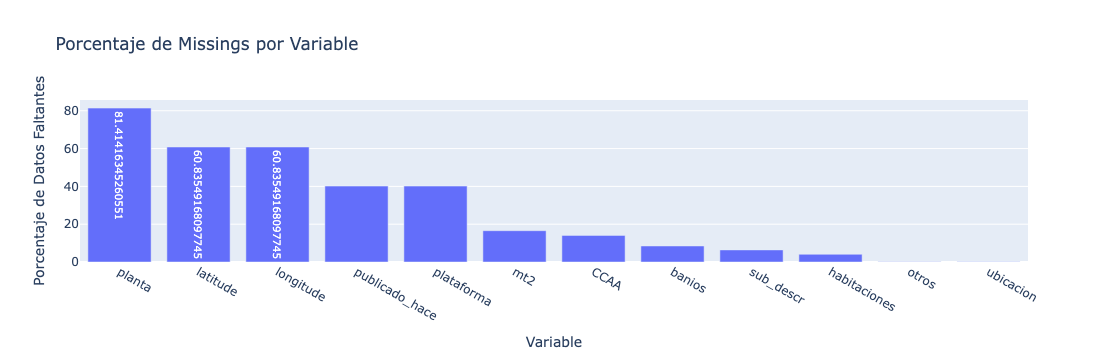

In [10]:
fig = px.bar(
    variables_con_missings,
    x='variable',
    y='missing_percentage',
    title='Porcentaje de Missings por Variable',
    labels={'variable': 'Variable', 'missing_percentage': 'Porcentaje de Missings'},
    text='missing_percentage'
)

# Actualizar el layout para mejorar la visualización
fig.update_layout(
    xaxis_title='Variable',
    yaxis_title='Porcentaje de Datos Faltantes',
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    showlegend=False
)

# Mostrar el gráfico
fig.show()

## Gestión de Missings - ?¿

### Gestión de outliers

In [11]:
def winsorize_with_pandas(s, limits):
    """
    s : pd.Series
        Series to winsorize
    limits : tuple of float
        Tuple of the percentages to cut on each side of the array, 
        with respect to the number of unmasked data, as floats between 0. and 1
    """
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))


In [12]:
## Función para gestionar outliers
from scipy import stats
def gestiona_outliers(col,clas = 'check'):
    
     print(col.name)
     # Condición de asimetría y aplicación de criterio 1 según el caso
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/stats.median_abs_deviation(col))>8
     
     # Calcular primer cuartil     
     q1 = col.quantile(0.25)  
     # Calcular tercer cuartil  
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     # Salida según el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper)))
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)

In [13]:
# Llamada en modo check
X.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x))

habitaciones
banios
mt2
latitude
longitude
planta
publicado_hace


habitaciones  banios  mt2  latitude  longitude  planta  publicado_hace
0           0.0     0.0  0.0       0.0        0.0     0.0             0.0
1           0.0     0.0  0.0       0.0        0.0     0.0             0.0
2           0.0     0.0  0.0       0.0        0.0     0.0             0.0